In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaModel
import pandas as pd
import ecopy as ep
import seaborn as sns
from scipy import stats

In [2]:
nTopics = 45

In [3]:
topic_names = [
'Water Quality',
'Sediment Transport',
'Wastewater Treatment',
'Flood Risk & Assessment',
'Hydrogeology',
'Coastal Hydrology', 
'River Flow',
'Wetland & Ecology',
'Runoff Quality',
'Rainfall-Runoff',
'Urban Drainage',
'Systems Hydrology',
'Surface-GW Interactions',
'Irrigation Water Management',
'Drought & Water Scarcity',
'Climate Change Impacts',
'Gauging & Monitoring',
'Forecasting',
'Glaciology',
'Salinity',
'Peatlands Mapping & Monitoring',
'Spatial Variability',
'Land Surface Flux',
'Solute Transport',
'Water Resources Management',
'Numerical Modeling',
'Hydrochemistry',
'Pollutant Removal',
'Groundwater Recharge',
'Uncertainty',
'Land Cover',
'Modeling & Calibration',
'Soil Moisture',
'Water Storage & Budgeting',
'Aquifers & Abstraction',
'Microbiology',
'Streamflow',
'Erosion',
'Dynamic Processes',
'Temporal Variability',
'Spatial Variability of Precipitation',
'Rainfall Intensity & Measurement',
'Watershed Hydrology',
'Hydraulics',
'Quantitative Analysis',
]

In [4]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'yellow': '#FFFF00',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'mistyrose': '#FFE4E1',
 'royalblue': '#4169E1',
 'lavender':  '#E6E6FA',
 'seashell': '#FFF5EE',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'moccasin':'#FFE4B5',
 'navy':'#000080',
 'paleturquoise':'#AFEEEE',
 'aliceblue':'#F0F8FF',
 'azure':'#F0FFFF',
 'khaki':'#F0E68C',
 'lightseagreen':'#20B2AA',
 'linen':'#FAF0E6',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

In [5]:
# Load model
lda_model = LdaModel.load(f'trained_models/trained_lda_model_new_{nTopics}')

In [6]:
# Load topic distributions
topic_distributions = np.load(f'data/topic_distributions_broad_{lda_model.num_topics}.npy')
topic_distributions_wogw = np.load(f'data/topic_distributions_broad_wogw_{lda_model.num_topics}.npy')

In [7]:
# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)

In [8]:
# load raw corpus dataframe
with open('data/raw_corpus_broad.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
with open('data/raw_corpus_broad_wogw.pkl', 'rb') as f:
    corpus_df_wogw = pkl.load(f)

In [9]:
# Pull journals
journals = corpus_df.Journal.unique()
journals

array(['HESS', 'HP', 'HSJ', 'JH', 'JHM', 'WRR', 'AWR', 'HGJ', 'JAWRA',
       'JCH', 'JWRPM', 'WR', 'WRM', 'ESWRT', 'GW', 'ISWCR', 'JHREG',
       'WRI'], dtype=object)

In [10]:
# Pull years
years = np.unique(corpus_df['Year'])
years

array(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [11]:
corpus_df['DOI']

0        10.5194/hess-21-6541-2017
1        10.5194/hess-21-6559-2017
2        10.5194/hess-21-6519-2017
3        10.5194/hess-21-6485-2017
4        10.5194/hess-21-6501-2017
5        10.5194/hess-21-6445-2017
6        10.5194/hess-21-6461-2017
7        10.5194/hess-21-6425-2017
8        10.5194/hess-21-6363-2017
9        10.5194/hess-21-6401-2017
10       10.5194/hess-21-6379-2017
11       10.5194/hess-21-6345-2017
12       10.5194/hess-21-6329-2017
13       10.5194/hess-21-6289-2017
14       10.5194/hess-21-6307-2017
15       10.5194/hess-21-6275-2017
16       10.5194/hess-21-6253-2017
17       10.5194/hess-21-6219-2017
18       10.5194/hess-21-6235-2017
19       10.5194/hess-21-6201-2017
20       10.5194/hess-21-6153-2017
21       10.5194/hess-21-6167-2017
22       10.5194/hess-21-6185-2017
23       10.5194/hess-21-6135-2017
24       10.5194/hess-21-6049-2017
25       10.5194/hess-21-6069-2017
26       10.5194/hess-21-6091-2017
27       10.5194/hess-21-6117-2017
28       10.5194/hes

In [12]:
# H(x) = - sum P(x)log P(x)
def calc_entropy(pmf):
    return -np.nansum(pmf * np.log(pmf)) #code implementation of entropy equation

In [13]:
# topic_distributions = np.where(topic_distributions == 0, 0.000000001, topic_distributions)

/home/mashrekur/anaconda3/lib/python3.7/site-packages/ecopy/diversity/diversity.py:147: RuntimeWarning: invalid value encountered in double_scalars
  return H/np.log(n)


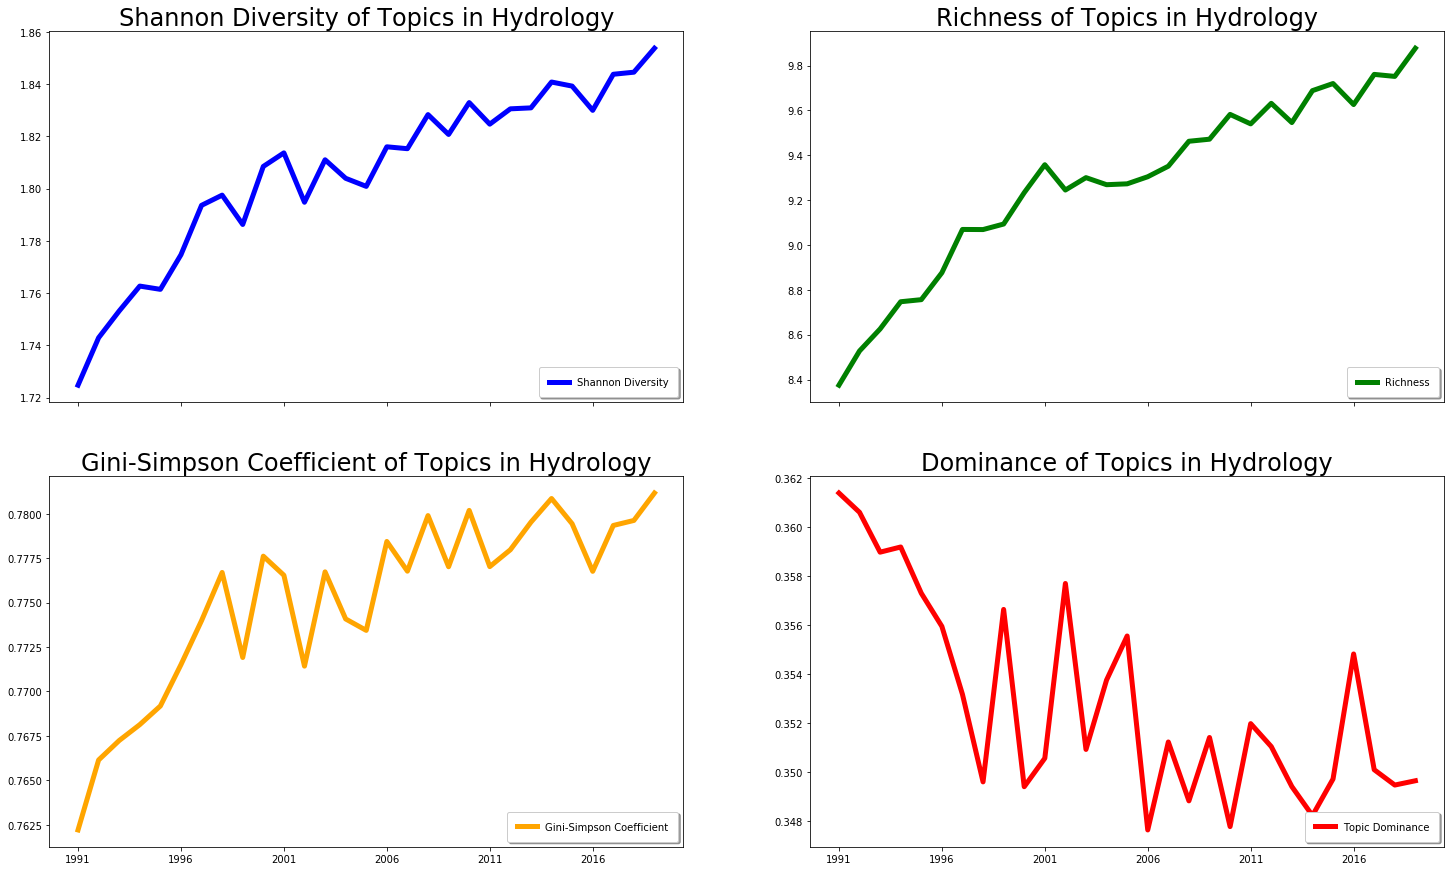

In [14]:
# Diversity of corpus
diversity_metrics = ['shannon', 'simpson', 'gini-simpson', 'dominance', 'even','spRich']
# corpus_diversity = pd.DataFrame(index = years, columns = diversity_metrics)

shannon_diversity = {}
richness = {}
gini_diversity = {}
dominance = {}
evenness = {}
shannon_diversity_mean = []
richness_mean = []
gini_diversity_mean = []
dominance_mean = []
evenness_mean = []
t_test = []


for y, year in enumerate(years):
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    shannon_diversity[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
    richness[year] = ep.diversity(topic_distributions_year, method = 'spRich', breakNA=False, num_equiv=False)
    gini_diversity[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
    dominance[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
    evenness[year] = ep.diversity(topic_distributions_year, method = 'even', breakNA=False, num_equiv=False)

    shannon_diversity_mean.append(np.mean(shannon_diversity[year]))
    richness_mean.append(np.mean(richness[year]))
    gini_diversity_mean.append(np.mean(gini_diversity[year]))
    dominance_mean.append(np.mean(dominance[year]))
    evenness_mean.append(np.mean(evenness[year]))
    
#     if y > 0:
# #         print((stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]])))
#         t_test.append(stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]]))
# #         print(t_test)

# plt.plot(t_test[:])

# plt.show()
#         print(year, np.median(shannon_diversity[year]), np.mean(shannon_diversity[year]), np.std(shannon_diversity[year]))
        
fig, axs = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)

axs[0, 0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Shannon Diversity',linewidth = 5)
axs[0, 0].set_title('Shannon Diversity of Topics in Hydrology',size=24)

axs[0, 1].plot(years[:-1], richness_mean[:-1], color = 'green', label = 'Richness',linewidth = 5)
axs[0, 1].set_title('Richness of Topics in Hydrology',size=24)

axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'orange', label = 'Gini-Simpson Coefficient',linewidth = 5)
axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

axs[1, 1].plot(years[:-1], dominance_mean[:-1], color = 'red', label = 'Topic Dominance',linewidth = 5)
axs[1, 1].set_title('Dominance of Topics in Hydrology',size=24)

axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


plt.xticks(years[0::5])
    
plt.savefig('figures/diversity_year_mean.png')    

In [15]:
# # Diversity of corpus w/o GW
# diversity_metrics = ['shannon', 'simpson', 'gini-simpson', 'dominance', 'even','spRich']
# # corpus_diversity = pd.DataFrame(index = years, columns = diversity_metrics)

# shannon_diversity_wogw = {}
# simpson_diversity_wogw = {}
# gini_diversity_wogw = {}
# dominance_wogw = {}
# shannon_diversity_mean_wogw = []
# simpson_diversity_mean_wogw = []
# gini_diversity_mean_wogw = []
# dominance_mean_wogw = []
# # t_test = []


# for y, year in enumerate(years):
#     topic_distributions_year = topic_distributions_wogw[corpus_df_wogw['Year'] == year,:]

#     shannon_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
#     simpson_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'simpson', breakNA=False, num_equiv=False)
#     gini_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
#     dominance_wogw[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
# #     evenness[year] = ep.diversity(topic_distributions_year, method = 'even', breakNA=False, num_equiv=False)

#     shannon_diversity_mean_wogw.append(np.mean(shannon_diversity_wogw[year]))
#     simpson_diversity_mean_wogw.append(np.mean(simpson_diversity_wogw[year]))
#     gini_diversity_mean_wogw.append(np.mean(gini_diversity_wogw[year]))
#     dominance_mean_wogw.append(np.mean(dominance_wogw[year]))
# #     evenness_mean.append(np.mean(evenness[year]))
    
# #     if y > 0:
# # #         print((stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]])))
# #         t_test.append(stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]]))
# # #         print(t_test)

# # plt.plot(t_test[:])

# # plt.show()
# # print(year, np.median(shannon_diversity[year]), np.mean(shannon_diversity[year]), np.std(shannon_diversity[year]))
        
# fig, ((axs[0, 0],axs[0, 1]),(axs[1, 0],axs[1, 1])) = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
# fig.add_gridspec(1,4)

# l1 = axs[0, 0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l2 = axs[0, 0].plot(years[:-1], shannon_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l3 = axs[0, 0].set_title('Shannon',size=24)
# l4 = axs[0, 1].plot(years[:-1], simpson_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l5 = axs[0, 1].plot(years[:-1], simpson_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l6 = axs[0, 1].set_title('Simpson',size=24)
# l7 = axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l8 = axs[1, 0].plot(years[:-1], gini_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l9 = axs[1, 0].set_title('Gini-Simpson',size=24)
# l10 = axs[1, 1].plot(years[:-1], dominance_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l11 = axs[1, 1].plot(years[:-1], dominance_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l12 = axs[1, 1].set_title('Dominance',size=24)

# axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[0,1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


# plt.xticks(years[0::5])


# plt.savefig('figures/diversity_year_mean_wogw.png')



#standard deviations as error bars/uncertainty bounds {done}
#mean diversity and std over whole corpus {done}
# one set of topic distributions per year, take mean of topic dist, yearwise mean diversity of the topic distributions {done}
#bar graphs

In [16]:
#Calculate std deviations of diversity metrics over corpus
shannon_diversity_std = []
richness_std = []
gini_diversity_std = []
dominance_std = []

for y, year in enumerate(years):
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    shannon_diversity[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
    gini_diversity[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
    dominance[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
    richness[year] = ep.diversity(topic_distributions_year, method = 'spRich', breakNA=False, num_equiv=False)
   

    shannon_diversity_std.append(np.std(shannon_diversity[year]))    
    gini_diversity_std.append(np.std(gini_diversity[year]))
    dominance_std.append(np.std(dominance[year]))
    richness_std.append(np.std(richness[year]))


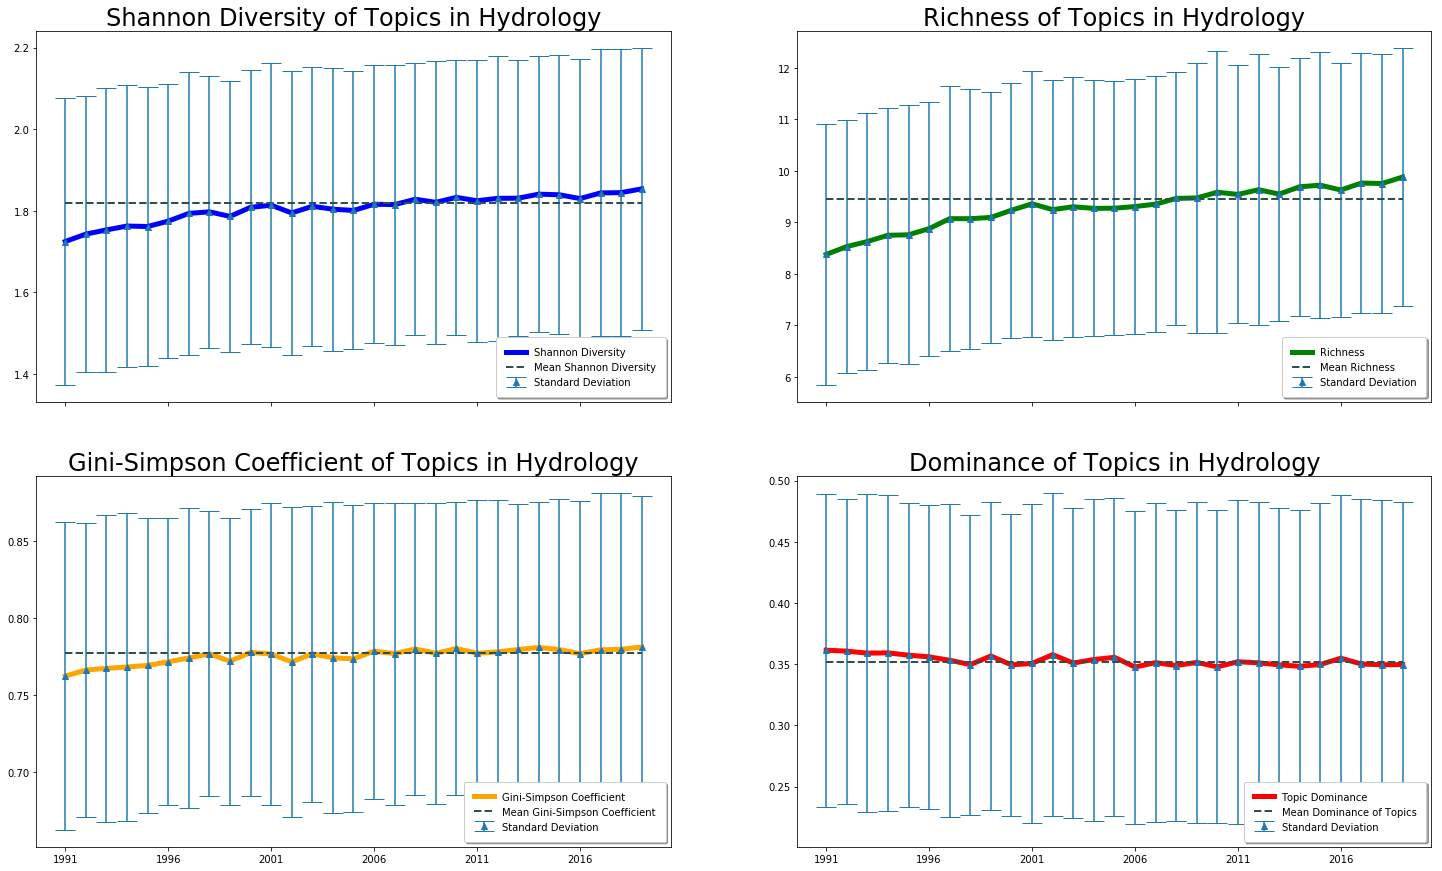

In [17]:
#mean diversity and standard deviations over entire corpus
#Richness: Number of species represented in a site; blind to their relative abundance distributions

mean_shannon_corpus = np.mean(ep.diversity(topic_distributions, method = 'shannon', breakNA=False, num_equiv=False))
mean_gini_corpus = np.mean(ep.diversity(topic_distributions, method = 'gini-simpson', breakNA=False, num_equiv=False))
mean_dominance_corpus = np.mean(ep.diversity(topic_distributions, method = 'dominance', breakNA=False, num_equiv=False))
mean_richness_corpus = np.mean(ep.diversity(topic_distributions, method = 'spRich', breakNA=False, num_equiv=False))

plot_mean_shannon_corpus = np.full(len(years),mean_shannon_corpus)
plot_mean_gini_corpus = np.full(len(years),mean_gini_corpus)
plot_mean_dominance_corpus = np.full(len(years),mean_dominance_corpus)
plot_mean_richness_corpus = np.full(len(years),mean_richness_corpus)

    
fig, axs = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
fig.add_gridspec(1,4)

axs[0, 0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Shannon Diversity',linewidth = 5)
axs[0, 0].plot(years[:-1],plot_mean_shannon_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Shannon Diversity',linewidth = 2)
axs[0, 0].errorbar(years[:-1],shannon_diversity_mean[:-1],shannon_diversity_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 0].set_title('Shannon Diversity of Topics in Hydrology',size=24)

axs[0, 1].plot(years[:-1], richness_mean[:-1], color = 'green', label = 'Richness',linewidth = 5)
axs[0, 1].plot(years[:-1],plot_mean_richness_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Richness',linewidth = 2)
axs[0, 1].errorbar(years[:-1],richness_mean[:-1],richness_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 1].set_title('Richness of Topics in Hydrology',size=24)

axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'orange', label = 'Gini-Simpson Coefficient',linewidth = 5)
axs[1, 0].plot(years[:-1],plot_mean_gini_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Gini-Simpson Coefficient',linewidth = 2)
axs[1, 0].errorbar(years[:-1],gini_diversity_mean[:-1],gini_diversity_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

axs[1, 1].plot(years[:-1], dominance_mean[:-1], color = 'red', label = 'Topic Dominance',linewidth = 5)
axs[1, 1].plot(years[:-1],plot_mean_dominance_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Dominance of Topics',linewidth = 2)
axs[1, 1].errorbar(years[:-1],dominance_mean[:-1],dominance_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 1].set_title('Dominance of Topics in Hydrology',size=24)

axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.xticks(years[0::5])

plt.savefig('figures/diversity_year_rich_mean_std.png')

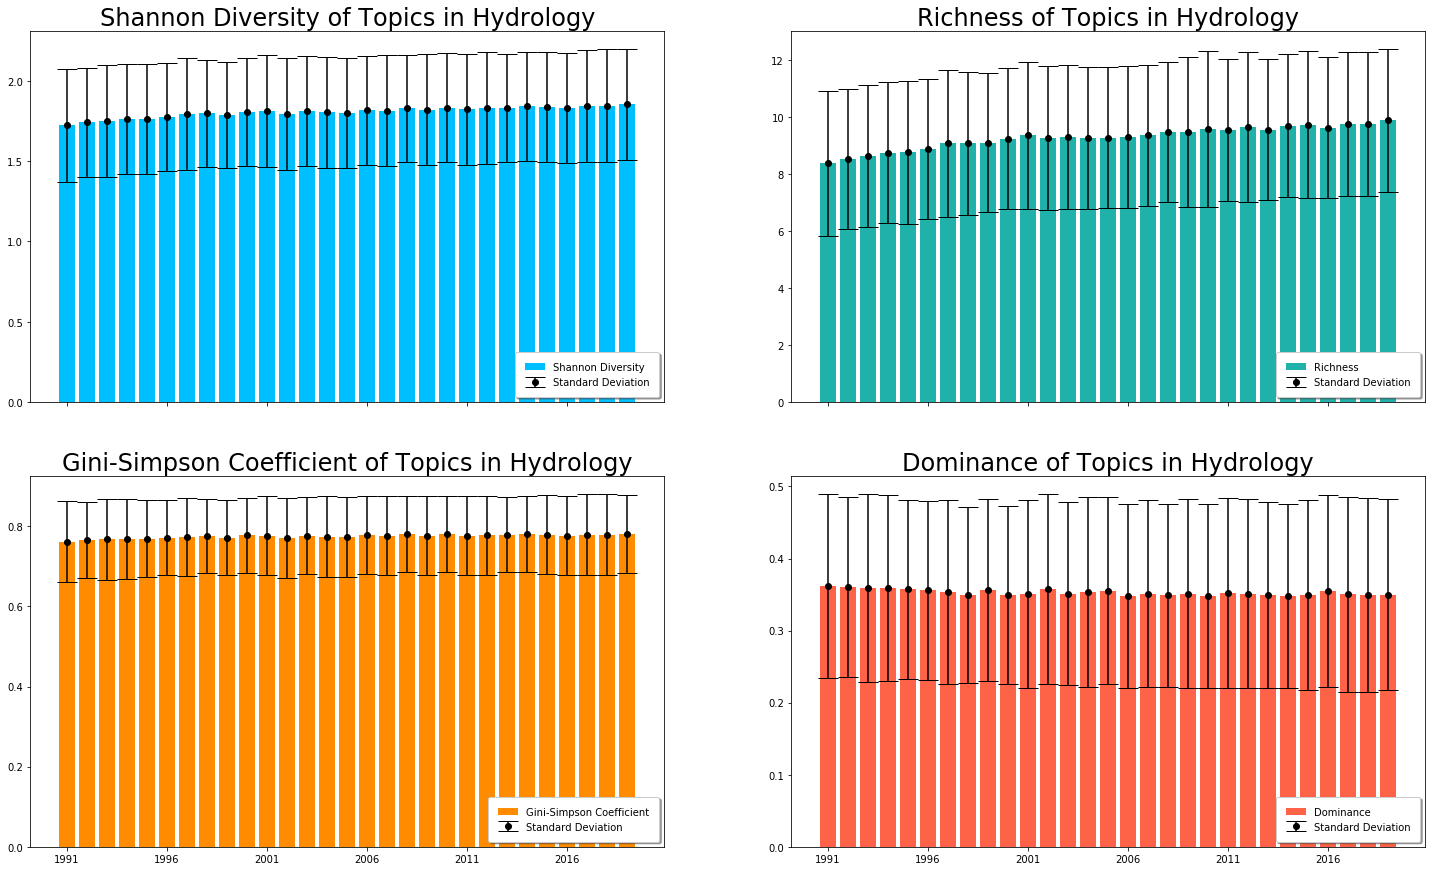

In [18]:
#plotting bar graphs
fig, axs = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
fig.add_gridspec(1,4)

axs[0, 0].bar(years[:-1], shannon_diversity_mean[:-1], color = 'deepskyblue', label = 'Shannon Diversity', linewidth = 5)
axs[0, 0].errorbar(years[:-1],shannon_diversity_mean[:-1],shannon_diversity_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 0].set_title('Shannon Diversity of Topics in Hydrology',size=24)

axs[0, 1].bar(years[:-1], richness_mean[:-1], color = 'lightseagreen', label = 'Richness', linewidth = 5)
axs[0, 1].errorbar(years[:-1],richness_mean[:-1],richness_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 1].set_title('Richness of Topics in Hydrology',size=24)

axs[1, 0].bar(years[:-1], gini_diversity_mean[:-1], color = 'darkorange', label = 'Gini-Simpson Coefficient', linewidth = 5)
axs[1, 0].errorbar(years[:-1],gini_diversity_mean[:-1],gini_diversity_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

axs[1, 1].bar(years[:-1], dominance_mean[:-1], color = 'tomato', label = 'Dominance', linewidth = 5)
axs[1, 1].errorbar(years[:-1],dominance_mean[:-1], dominance_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 1].set_title('Dominance of Topics in Hydrology',size=24)

axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.xticks(years[0::5])

plt.savefig('figures/diversity_bar_chart.png')


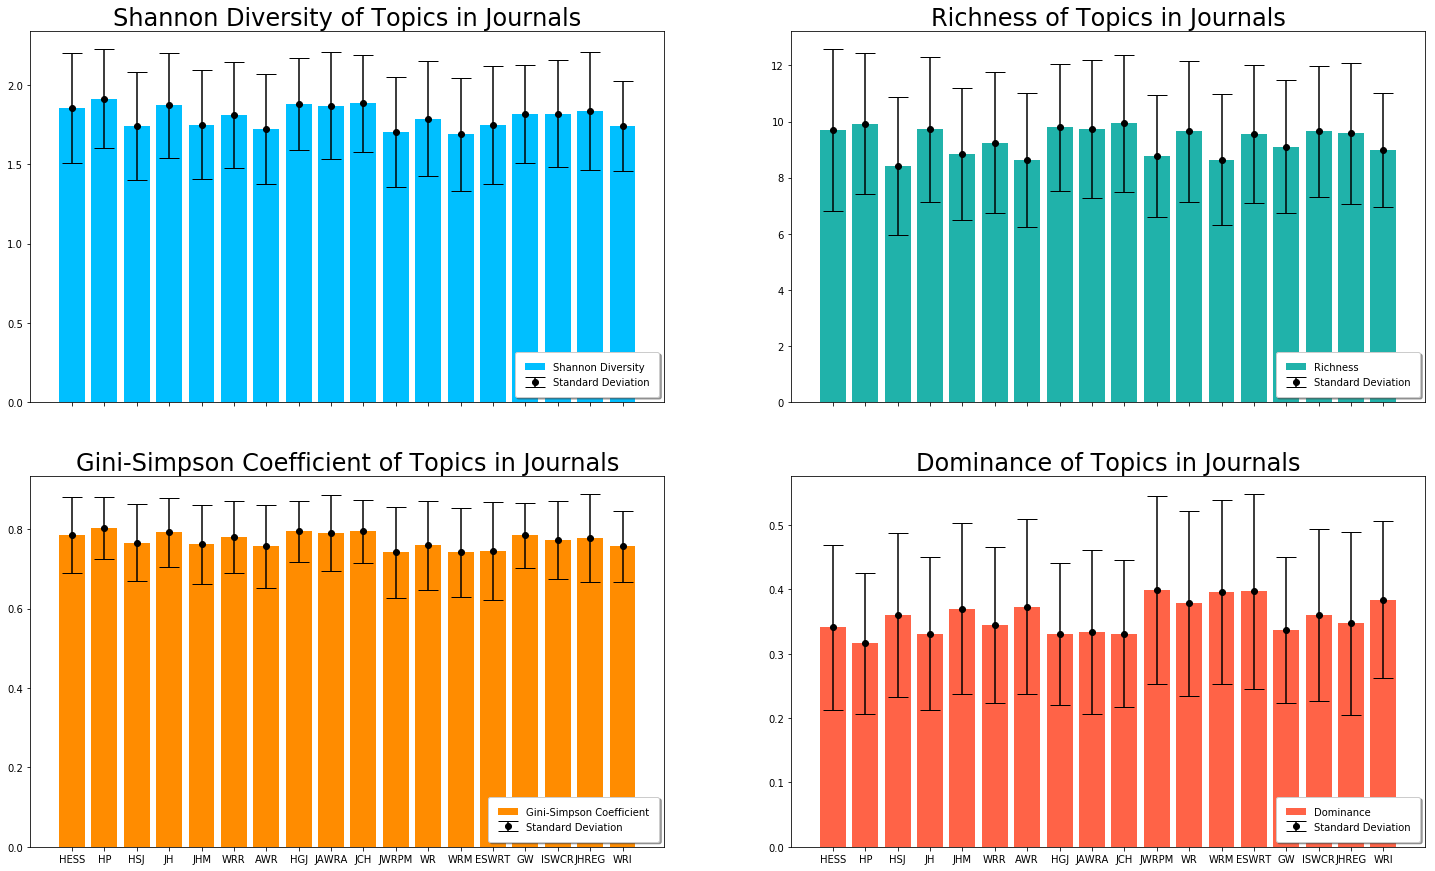

In [19]:
#diversities journal-wise

shannon_diversity_journal_mean = []
gini_diversity_journal_mean = []
dominance_journal_mean = []
richness_journal_mean = []

shannon_diversity_journal_std = []
gini_diversity_journal_std = []
dominance_journal_std = [] 
richness_journal_std = []

for j, journal in enumerate(journals):
    topic_distributions_journal = topic_distributions[corpus_df['Journal'] == journal,:]

    shannon_diversity[journal] = ep.diversity(topic_distributions_journal, method = 'shannon', breakNA=False, num_equiv=False)
    gini_diversity[journal] = ep.diversity(topic_distributions_journal, method = 'gini-simpson', breakNA=False, num_equiv=False)
    dominance[journal] = ep.diversity(topic_distributions_journal, method = 'dominance', breakNA=False, num_equiv=False)
    richness[journal] = ep.diversity(topic_distributions_journal, method = 'spRich', breakNA=False, num_equiv=False)
   

    shannon_diversity_journal_mean.append(np.mean(shannon_diversity[journal]))    
    gini_diversity_journal_mean.append(np.mean(gini_diversity[journal]))
    dominance_journal_mean.append(np.mean(dominance[journal]))
    richness_journal_mean.append(np.mean(richness[journal]))
    
    shannon_diversity_journal_std.append(np.std(shannon_diversity[journal]))    
    gini_diversity_journal_std.append(np.std(gini_diversity[journal]))
    dominance_journal_std.append(np.std(dominance[journal]))
    richness_journal_std.append(np.std(richness[journal]))




#plotting bar graphs
fig, axs = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
fig.add_gridspec(1,4)

axs[0, 0].bar(journals, shannon_diversity_journal_mean, color = 'deepskyblue', label = 'Shannon Diversity', linewidth = 5)
axs[0, 0].errorbar(journals,shannon_diversity_journal_mean, shannon_diversity_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 0].set_title('Shannon Diversity of Topics in Journals',size=24)

axs[0, 1].bar(journals, richness_journal_mean, color = 'lightseagreen', label = 'Richness', linewidth = 5)
axs[0, 1].errorbar(journals, richness_journal_mean, richness_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 1].set_title('Richness of Topics in Journals',size=24)

axs[1, 0].bar(journals, gini_diversity_journal_mean, color = 'darkorange', label = 'Gini-Simpson Coefficient', linewidth = 5)
axs[1, 0].errorbar(journals, gini_diversity_journal_mean, gini_diversity_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Journals',size=24)

axs[1, 1].bar(journals, dominance_journal_mean, color = 'tomato', label = 'Dominance', linewidth = 5)
axs[1, 1].errorbar(journals, dominance_journal_mean, dominance_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 1].set_title('Dominance of Topics in Journals',size=24)

axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


plt.savefig('figures/diversity_journal_bar_chart.png')

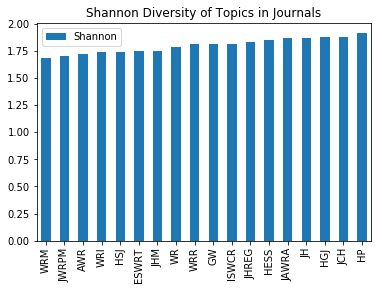

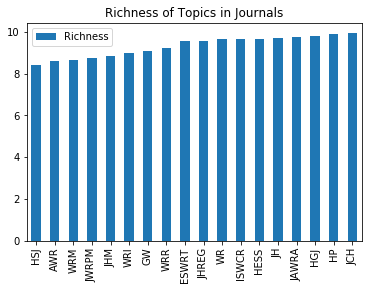

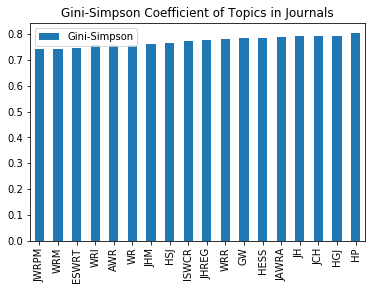

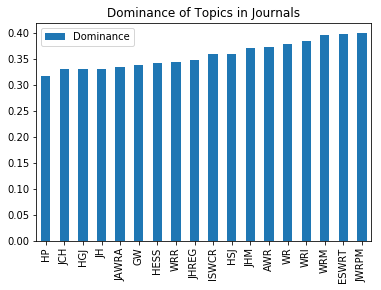

In [20]:
col1 = ['Shannon']
col2 = ['Richness']
col3 = ['Gini-Simpson']
col4 = ['Dominance']
shannon_df = pd.DataFrame(data = shannon_diversity_journal_mean, columns = col1, index = journals)
richness_df = pd.DataFrame(data = richness_journal_mean, columns = col2, index = journals)
gini_df = pd.DataFrame(data = gini_diversity_journal_mean, columns = col3, index = journals)
dominance_df = pd.DataFrame(data = dominance_journal_mean, columns = col4, index = journals)

shannon_df_sort = shannon_df.sort_values('Shannon')
richness_df_sort = richness_df.sort_values('Richness')
gini_df_sort = gini_df.sort_values('Gini-Simpson')
dominance_df_sort = dominance_df.sort_values('Dominance')


#plotting bar graphs - sorted

ax1 = shannon_df_sort.plot.bar()
ax1.set_title('Shannon Diversity of Topics in Journals',size=12)

ax2 = richness_df_sort.plot.bar()
ax2.set_title('Richness of Topics in Journals',size=12)

ax3 = gini_df_sort.plot.bar()
ax3.set_title('Gini-Simpson Coefficient of Topics in Journals',size=12)

ax4 = dominance_df_sort.plot.bar()
ax4.set_title('Dominance of Topics in Journals', size = 12)


plt.savefig('figures/diversity_journal_sort_bar_chart.png')

In [21]:
# # Do topic popularities have a relationship with mean Diversities?

# shannon_diversity_all = []
# richness_all = []
# gini_diversity_all = []
# dominance_all = []

# # calculate time series of topic distributions
# topic_distributions_by_year = np.zeros([len(years), lda_model.num_topics])
# for y, year in enumerate(years):
#     dist_year = topic_distributions[corpus_df['Year'] == year,:]
#     topic_distributions_by_year[y,:] = np.sum(dist_year, axis=0) / np.sum(dist_year)

# for y, year in enumerate(years):
#     topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

#     shannon_diversity[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
#     richness[year] = ep.diversity(topic_distributions_year, method = 'spRich', breakNA=False, num_equiv=False)
#     gini_diversity[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
#     dominance[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)


#     shannon_diversity_all.append(np.array(shannon_diversity[year]))
#     richness_all.append(np.array(richness[year]))
#     gini_diversity_all.append(np.array(gini_diversity[year]))
#     dominance_all.append(np.array(dominance[year]))

# # for y, year in enumerate(years):
# #     for t, topics in enumerate(topic_names):
# # #need the combined matrices
# coeff_corr_matrix = np.corrcoef(topic_distributions_by_year[:][:], shannon_diversity_mean)
# corr_xy = coeff_corr_matrix[0,1]
# r_sq = corr_xy**2
# print(r_sq)
    
    
# #try to solve
    
